# Machine Learning Project
## Kalbe Nutritionals Data Scientist Virtual Internship Rakamin

Time Series Forecasting Using ARIMA Model

by : Ahmad Fanani


In [ ]:
import pandas as pd
import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/KULIAH/Pribadi/VIX Rakamin/W4/Case Study - Transaction.csv', delimiter=';')

In [ ]:
# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,2022-12-31,P10,15000,5,75000,3
5016,TR5604,271,2022-12-31,P2,3200,4,12800,9
5017,TR81224,52,2022-12-31,P7,9400,6,56400,9
5018,TR85016,18,2022-12-31,P8,16000,3,48000,13


In [ ]:
# New data
regression_data = df.groupby('Date')['Qty'].sum().reset_index()

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


In [ ]:
msk = (regression_data.index < len(regression_data)-60)
regression_data_train = regression_data[msk].copy()
regression_data_test = regression_data[~msk].copy()

In [ ]:
regression_data_test.shape

(60, 2)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


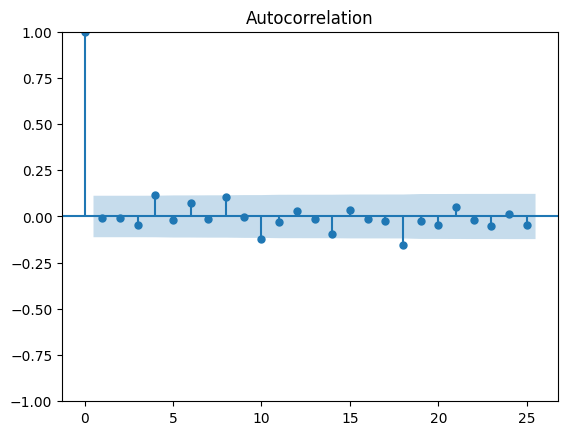

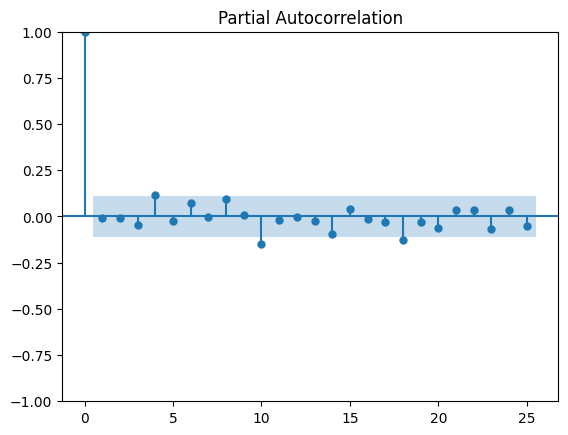

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(regression_data_train['Qty'])

pacf_original = plot_pacf(regression_data_train['Qty'])

In [ ]:
#ADF Test

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(regression_data_train['Qty'])
print(f'p-value: {adf_test[1]}')

p-value: 4.533874072953758e-30


## Transform to stationary: differencing

<Axes: >

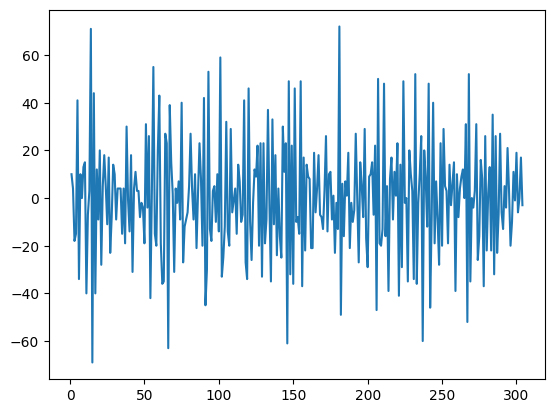

In [ ]:
regression_data_train_diff = regression_data_train['Qty'].diff().dropna()
regression_data_train_diff.plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


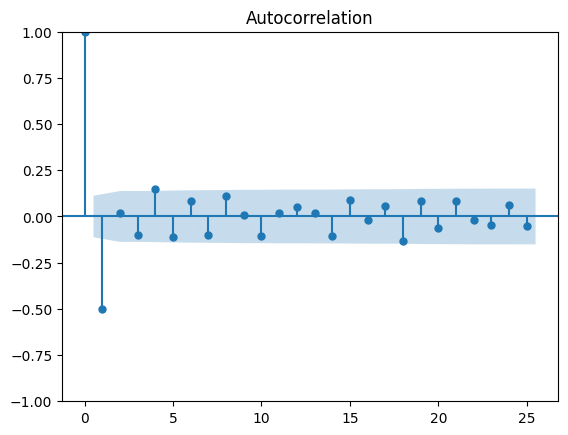

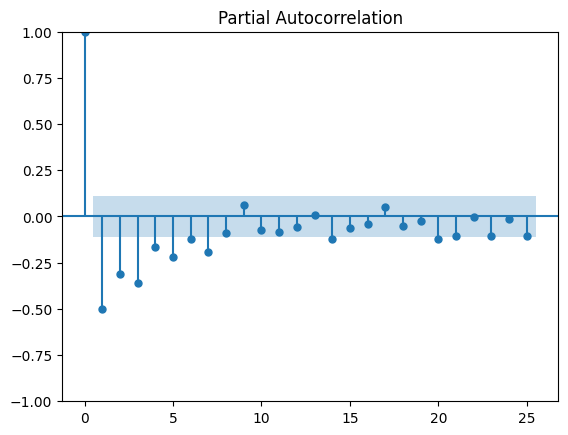

In [ ]:
acf_diff = plot_acf(regression_data_train_diff)

pacf_diff = plot_pacf(regression_data_train_diff)

In [ ]:
adf_test = adfuller(regression_data_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 5.826841952514913e-22


## ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(regression_data_train['Qty'], order=(100,1,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  305
Model:               ARIMA(100, 1, 0)   Log Likelihood               -1226.778
Date:                Fri, 28 Jul 2023   AIC                           2655.556
Time:                        16:25:23   BIC                           3030.976
Sample:                             0   HQIC                          2805.733
                                - 305                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0164      0.081    -12.515      0.000      -1.176      -0.857
ar.L2         -0.9399      0.110     -8.513      0.000      -1.156      -0.724
ar.L3         -0.9683      0.119     -8.125      0.0

## Prediction

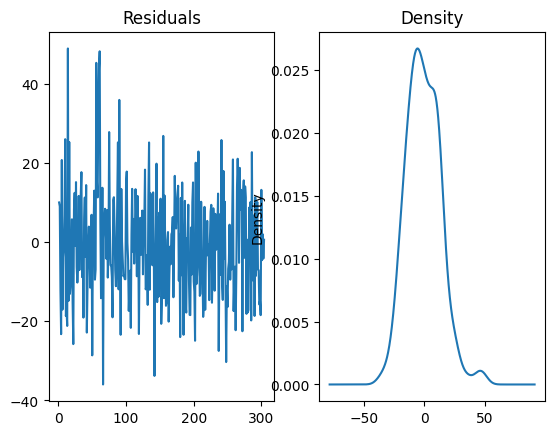

In [ ]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


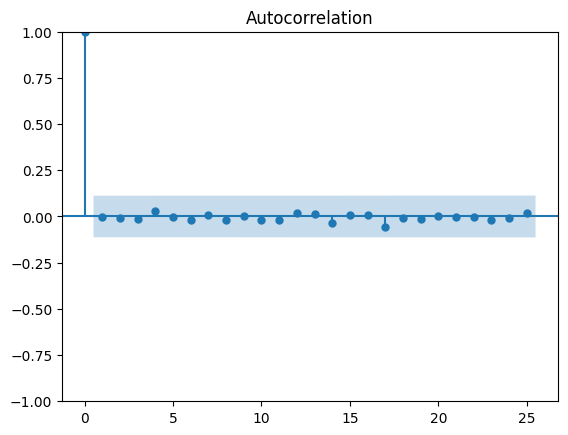

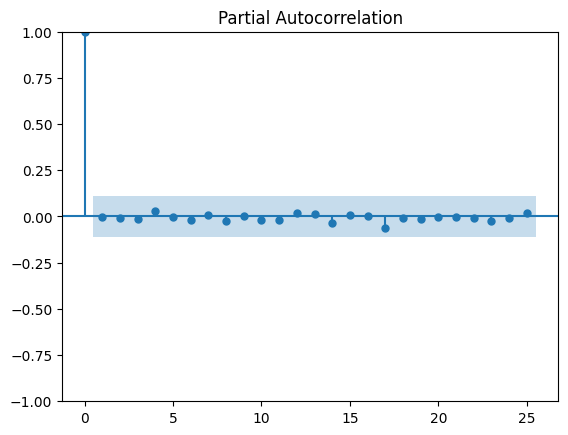

In [ ]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: >

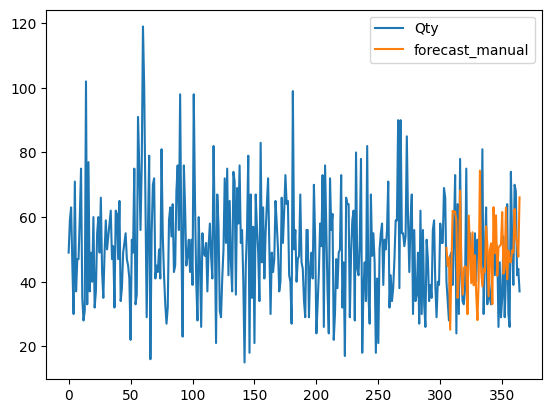

In [ ]:
forecast_test = model_fit.forecast(len(regression_data_test))

regression_data['forecast_manual'] = [None]*len(regression_data_train) + list(forecast_test)

kolom_tertentu = ['Qty', 'forecast_manual']

regression_data[kolom_tertentu].plot()

